<a href="https://colab.research.google.com/github/eloigil/ai-course/blob/master/05-introduction-to-machine-learning/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

# Logistic regression
---

In [5]:
n = 100
h = n//2
dimen = 2

data = np.random.randn(n, dimen) * 3
data

array([[ 3.42151732e-01, -1.56640020e+00],
       [ 2.23999438e+00,  3.51143868e+00],
       [-1.03614266e+00, -2.66897607e+00],
       [ 5.72218289e+00,  7.94927291e-01],
       [ 3.83310669e+00,  8.72038408e-01],
       [ 4.73045766e-01, -5.27672696e+00],
       [-2.92390235e+00,  1.14037679e+00],
       [-5.26741698e-01,  3.76377381e+00],
       [ 5.79408758e+00,  4.24037890e+00],
       [-7.00561366e+00,  1.69683170e+00],
       [ 1.47907585e+00,  1.41381101e+00],
       [-4.08276921e-01, -4.28257140e+00],
       [-1.04095231e+00, -8.20062488e+00],
       [-2.56945505e+00, -6.30290949e-01],
       [-1.71034813e+00,  1.25607956e-01],
       [ 6.34583499e+00, -3.31058610e-01],
       [ 7.18693380e-01, -4.56870161e+00],
       [-6.49143918e+00, -1.74162574e+00],
       [ 7.59213941e-01, -1.98995968e+00],
       [-5.02532959e+00,  4.30969706e+00],
       [-4.00076193e-01,  2.15125807e+00],
       [ 3.36333400e+00,  1.08228763e+00],
       [-1.03194326e+00,  2.06823123e+00],
       [-2.

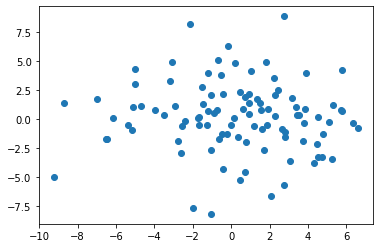

In [8]:
plt.scatter(data[:,0], data[:,1])

In [0]:
data[:h, :]= data[:h, :] - 3*np.ones((h, dimen))
data[h:, :]= data[h:, :] - 3*np.ones((h, dimen))

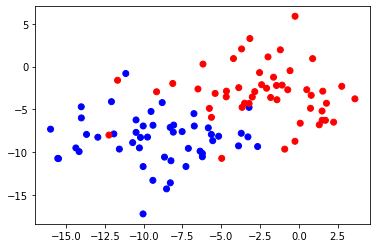

In [16]:
colors = ['blue', 'red']

color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color)

In [17]:
target = np.array([0]*h + [1]*h).reshape(n, 1)

x = torch.from_numpy(data).float().requires_grad_(True)

y = torch.from_numpy(target).float()

x.shape, y.shape


(torch.Size([100, 2]), torch.Size([100, 1]))

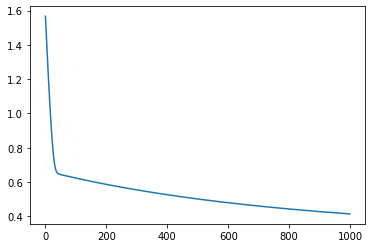

In [22]:
model = nn.Sequential(
          nn.Linear(2,1),
          nn.Sigmoid()
        )
loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

losses = []
iterations = 1000

for i in range(iterations):
  result = model(x)

  loss = loss_function(result, y)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

plt.plot(range(iterations), losses)

In [26]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

red = torch.Tensor([[8, 6]])
prediction = model(red).data[0][0] > 0.5
print(colors[prediction])

blue
red


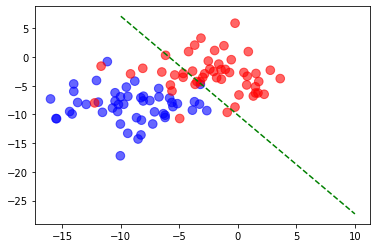

In [28]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

x_axis = np.linspace(-10,10,n)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis, 'g--')